# <span align="center">Quantifying The World Case Study Unit 6 - SPAM Classification</span>
### <span align="right">Ryan Bass and Brett Benefield </span>
### <span align="right">February 21, 2019</span>

Q.19: Consider the other parameters that can be used to control the recursive partitioning process. Read the documentation for them in the rpart.control() documentation. Also, carry out an Internet search for more information on how to tweak the rpart() tuning parameters. Experiment with values for these parameters. Do the trees that result make sense with your understanding of how the parameters are used? Can you improve the prediction using them?

Whichever case study you choose, write a report on your analysis, including introduction, background, methods, results, and conclusions/discussions. We will spend time in the live session or in asynchronous materials on cleaning the data; therefore, your write-up need only focus on answering the question of your choice. In other words, you do not have to include code that is already in the chapter or in other class materials.

# Introduction

Since the invention of email, SPAM has been prevelant in inboxes around the world. After seeing hundreds to thousands of SPAM emails everyone has conciously, or not, trained themselves in being able to spot whether or not an email is SPAM at a glance. Without looking at the contents of the email this can be done by looking at the subject header, or if the sender's email address is not masked as a more legitimate one. All of these that you've seen are SPAM emails that have bypassed a SPAM filter. SPAM filters are an automated procedure that classify incoming emails as SPAM or not (HAM) and prevent SPAM from entering your inbox. To build our own SPAM filter we will utilize a dataset with over 9000 emails that have been hand classified as SPAM or HAM by SpamAssassin (http://spamassassin.apache.org) to make models. 

This dataset was utilized in a case study in the textbook 'Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving' and was text processed to have more structure to our data of words. We will be utilizing the same steps to process the text in these emails by subseting them into three sections; the header (including subject line, sender's email address, etc), the body that contains the actual message, and any attachments that were in the email. This text processing was generalized and called as functions so it can easily be applied to the entire dataset. Once all the contents were subsetted, every unique word can be parsed out to build a dictionary that will help count the frequencies of words in SPAM versus HAM emails. These tendencies can then be leveraged into building accurate models that can classify an email as SPAM or not.

With the dataset already built to be modeled, we looked to explore the rpart library in R in order to create an improved decision tree model. Parameters ranged from decreasing the depth of a tree as to visualize the most important attributes for classification, to pruning the tree to limit the size of terminal nodes. We will walk through altering the parameters one at a time to visualize and analyze its effects on the tree/model, and finish our analysis by tuning the hyperparameters all at once to build an optimized classification model for SPAM.

# Methods

### Metric Choice

When we have to select the best model we must first decide which metric best interprets our goal of the model. We believe that it would be much more detrimental for HAM emails to be classified as SPAM rather than the inverse, which would only be an inconveinance. Therefore, if we are classifying on whether an email is SPAM or not (HAM), we want as few false positives as possible. The four most common metrics for judging models are accuracy, precision, recall, and f1 score. 

Accuracy is just the ratio of correctly predicted observations (ex. 9 out of 10 correctly predicted is 90% accurate) and is useful for evenly distributed response variables as well as the false positives and false negatives being equally the same cost as determined by the user. While our data was subsetted to be evenly distrubted between SPAM and HAM, we have concluded that false positives would be more costly than false negatives so we will not be using accuracy.

Recall (or sensitivity) is calculated as: $$Recall = True Positives / (True Positives + False Negatives)$$ The denominator of the ratio is the entire count of positive instances in the dataset, so it is a ratio of only the correctly predicted POSITIVE instances. Because we're only looking at positive instances, uneven distrubtion of our response variable would not be an issue. This does not penalize false positives therefore we will not be using recall.

Precision is calculated as: $$Precision = True Positives / (True Positives + False Positives)$$ The denominator here the count of all positives your model predicted (regardless if they are true or not), so it will penalize a model that overly predicts positive results. This fits our thought process of false positives being more harmful in our model. Like with recall, because we're only looking at positive instances an uneven distrubtion of our response variable would not be an issue. 

F1 score is calculated as: $$F1 = 2*(Recall * Precision)/(Recall + Precision)$$ It is a weighted average of both precision and recall. Because of this it weighs false positives and fals negatives equally. It is most appropriate as a better metric than accuracy, especially when response variables are unevenly distributed. Since we believe false positives are more costly when classifing as SPAM, we will not use F1 score.

The metric that penalizes false positives the most is precision. Because of this precision would be the best metric to judge how well our models are performing.

### RPART Parameter Analysis

CART (Classification and Regression Trees) is a trademarked term, so R's implementation of the CART algorithm is called RPART (Recursive Partitioning And Regression Trees). We will be using RPART to create our classification decision trees and will look at its most important parameters. The splits in the decision tree are based on the gini metric which provides the algorithm a way to determine what features make the best splits. The gini score is calculated as $$ i(t) =1−\sum_{c=1}^j = p^2(j|t) $$

#### Max Depth

One of the tuning parameters in the rpart library is the max depth value. The max depth value determines how many levels from the root node it can go down. In the figure below, we have started with a max depth of two. In this case, the number of capital letters splits the data into two different bins with the minimum amount of wrong classifications. The tree then moves down one more level and finds the two highest features that minimize the number of wrong classifications. At this point the tree stops. If we set the max depth to three, it would calculcate the gini metric if it was to further subdivide the data. A small value for max depth will result in a very shallow tree that will identify the features that have the greatest impact on correctly classifying an observation. A shallow decision tree is often used to determine the most significant features. A larger value of max depth can improve the accuracy of classification up to a point. If the max depth value is set too high then the algorithm begins to overfit the training data. The scores on the training data would approach 100% accuracy at the expense of losing generalization and the prediction on the test data would start to decrease. 

[1] "Max Depth Value:  2"
[1] "Max Depth Value:  4"


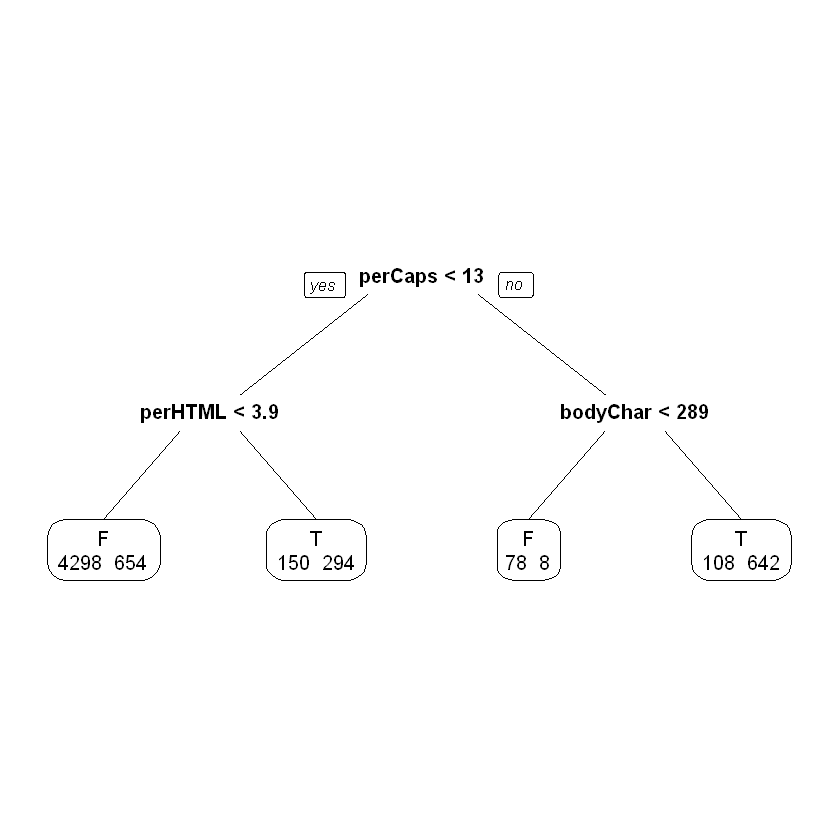

[1] "Max Depth Value:  6"


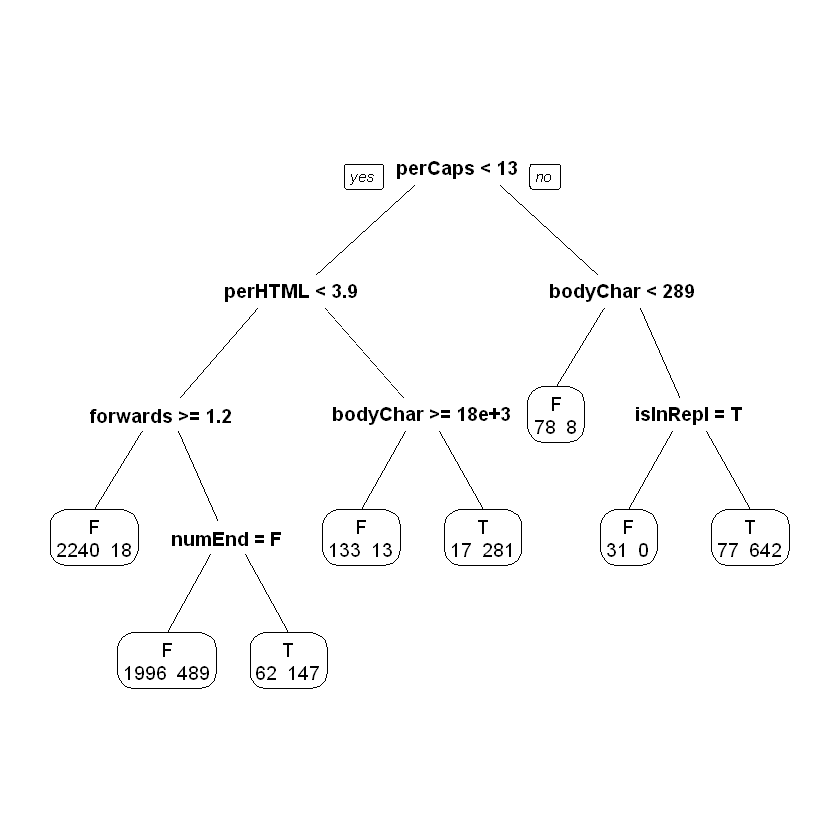

[1] "Max Depth Value:  8"


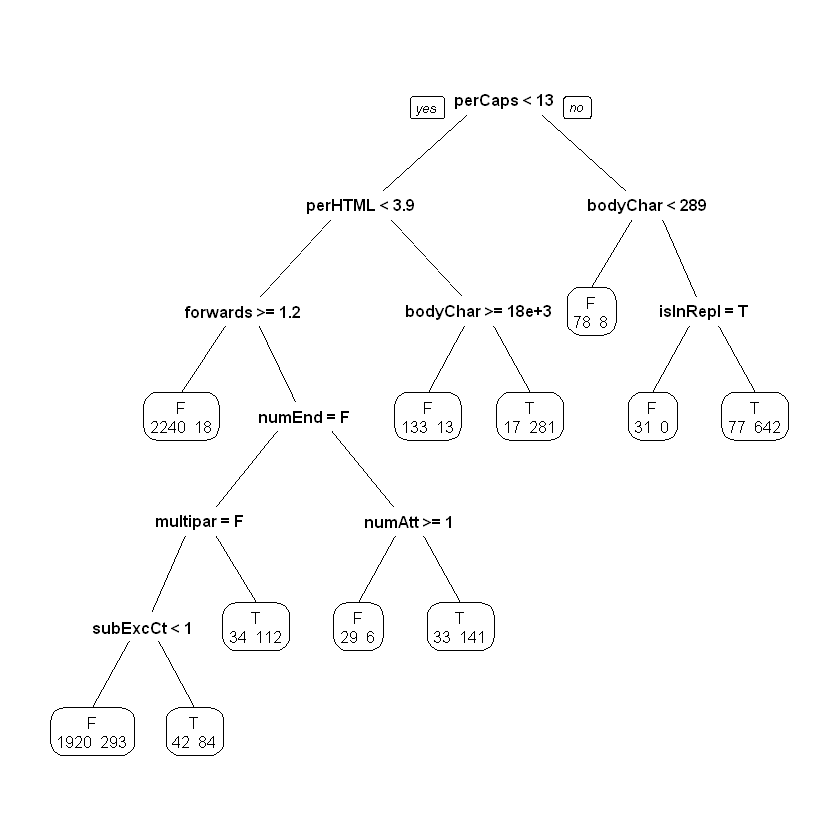

[1] "Max Depth Value:  10"


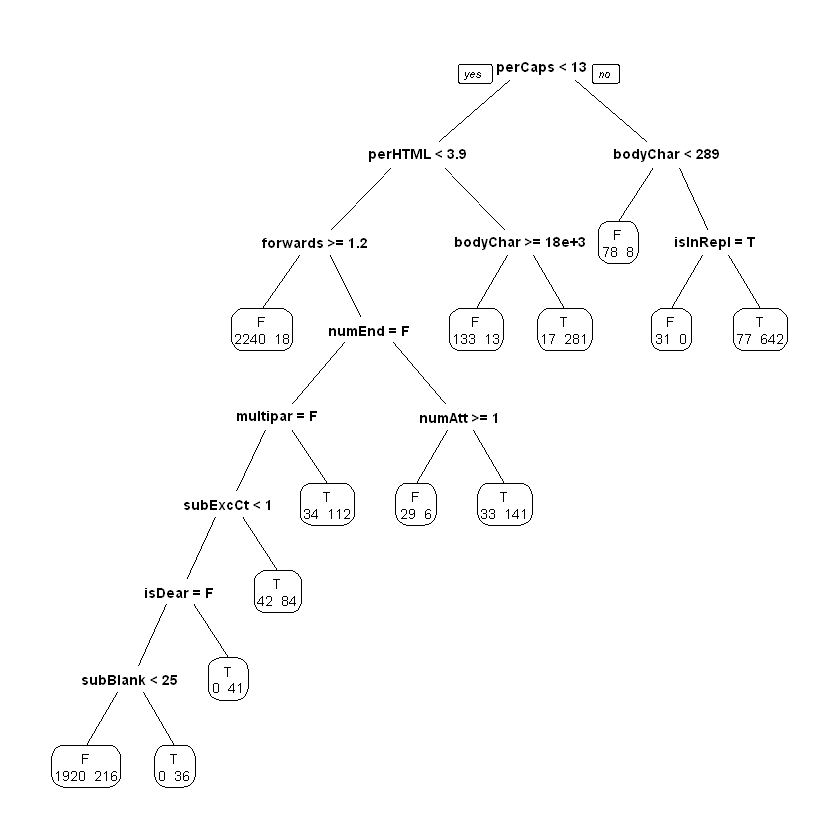

[1] "Max Depth Value:  12"
[1] "Max Depth Value:  14"
[1] "Max Depth Value:  16"
[1] "Max Depth Value:  18"
[1] "Max Depth Value:  20"


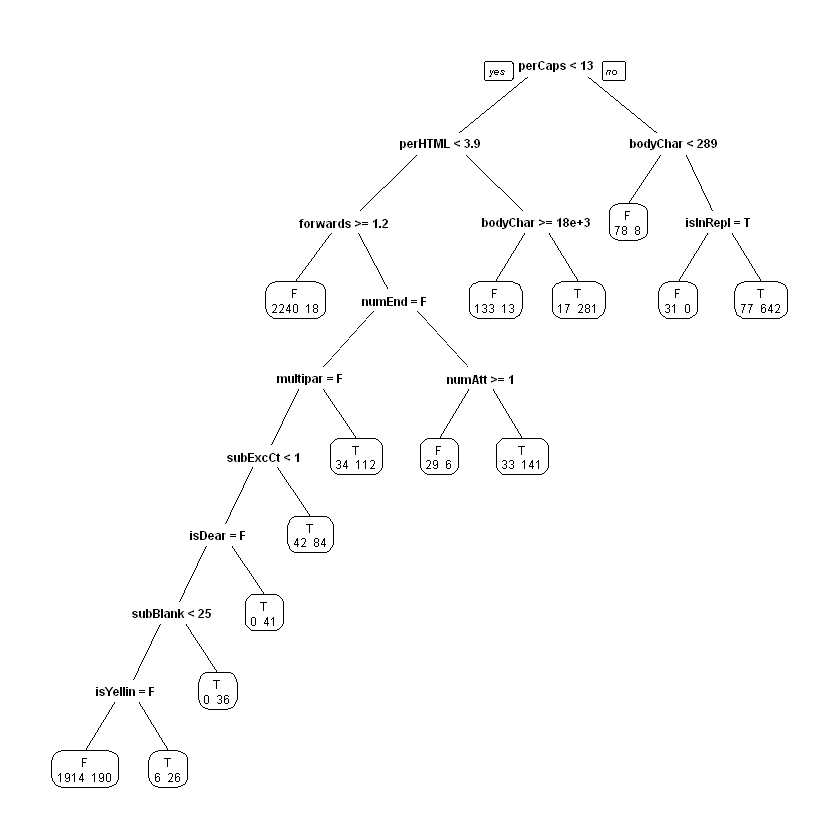

In [11]:
result <- exploreMaxDepthEffect(testFeatures, testLabels)

In [12]:
result

Max Depth,Precision,Recall,F1-Score
2,0.7818792,0.5832290,0.6681004
4,0.8539326,0.6658323,0.7482419
6,0.8337802,0.7784731,0.8051780
8,0.8422392,0.8285357,0.8353312
10,0.8435544,0.8435544,0.8435544
12,0.8435544,0.8435544,0.8435544
14,0.8435544,0.8435544,0.8435544
16,0.8435544,0.8435544,0.8435544
18,0.8435544,0.8435544,0.8435544
20,0.8435544,0.8435544,0.8435544


From tuning only the maxdepth by intervals of two we found the highest precision with depth of 4. It is notable that as we increase the depth on our tree that method of splitting of the nodes stays the same, only terminal nodes are split further. So without needing to change our maxdepth we would be able to see that our most important feature to split our data on first is the percentage of capitalized letters in the email's body followed by being split by either the percentage of HTML character's in the email's body or the raw count of characters in the email's body. We can also see the depth only really increasing on the left side because of the volume of instances still available to split upon. If we were to increase the depth even more this would likely be the only part of the tree to increase its depth but our precision has clearly met a plateau at 84.36% at a max depth of 10. It's also of note that at a maxdepth of 10 how much recall increases compared to the optimal precision score at a max depth of 4. So for a decrease in precision by 1.04% we could gain 17.77% in recall, this trade off might be enticing even though our most important metric is precision.

#### Minsplit

Another tuning parameter is the minsplit value. The minsplit value is used to determine the number of observations that must exist in a child node before it can be considered for a split. This value prevents the algorithm from overfitting the data and splitting the data until there is one observation in each child node. In the figure below, we see that as the value of the minsplit value increases, the number of splits decrease. This is a way to identify nodes that have a large number of observations that are good candidates to be further split for better prediction accuracy. It is unlikely that a node with few observations will benefit from being split further to improve accuracy. Therefore if we increase the minsplit we should get less complex trees (less leafs), or decrease it to gain more complex trees. While having a more complex model would lead to more precision in our model's training set, decreasing our minsplit at a certain point will overfit our model.

[1] "Minsplit Value:  20"
[1] "Minsplit Value:  40"
[1] "Minsplit Value:  60"
[1] "Minsplit Value:  80"
[1] "Minsplit Value:  100"


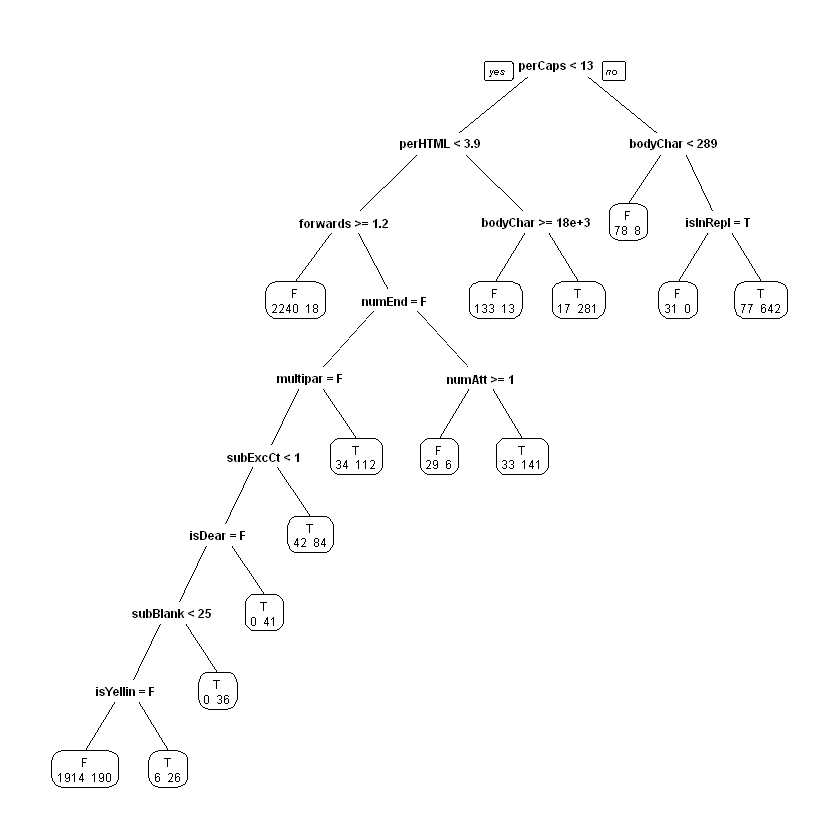

[1] "Minsplit Value:  120"


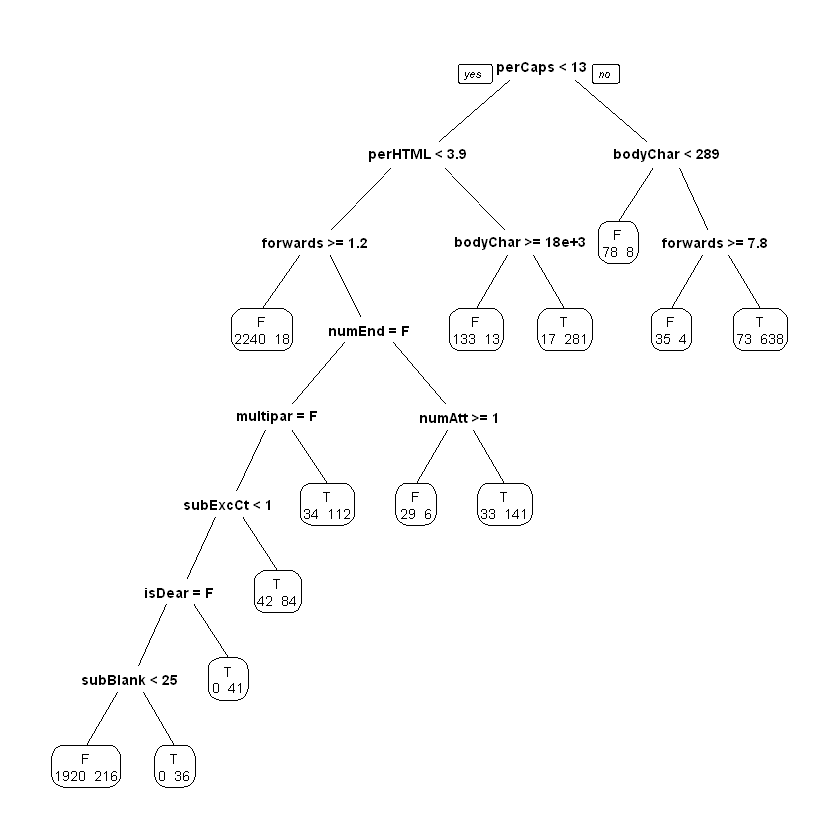

[1] "Minsplit Value:  140"


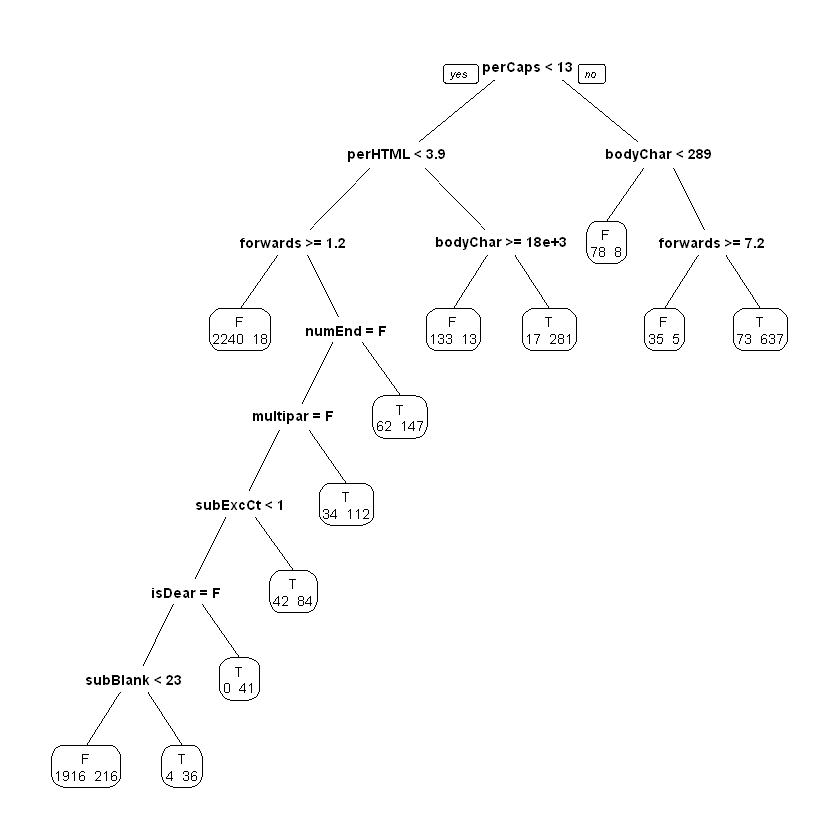

[1] "Minsplit Value:  160"


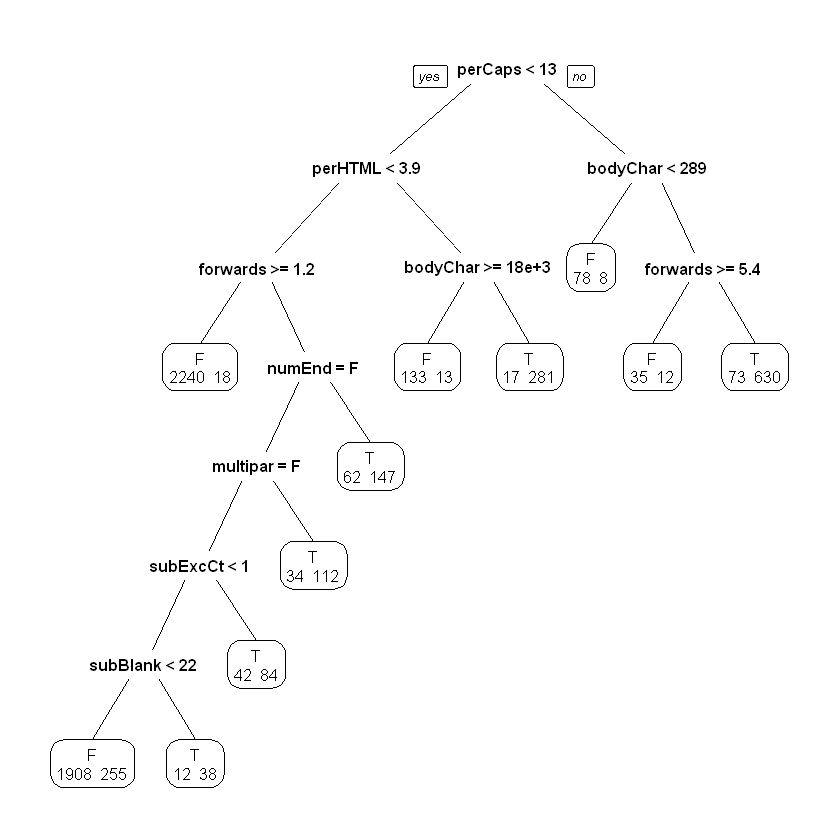

[1] "Minsplit Value:  180"


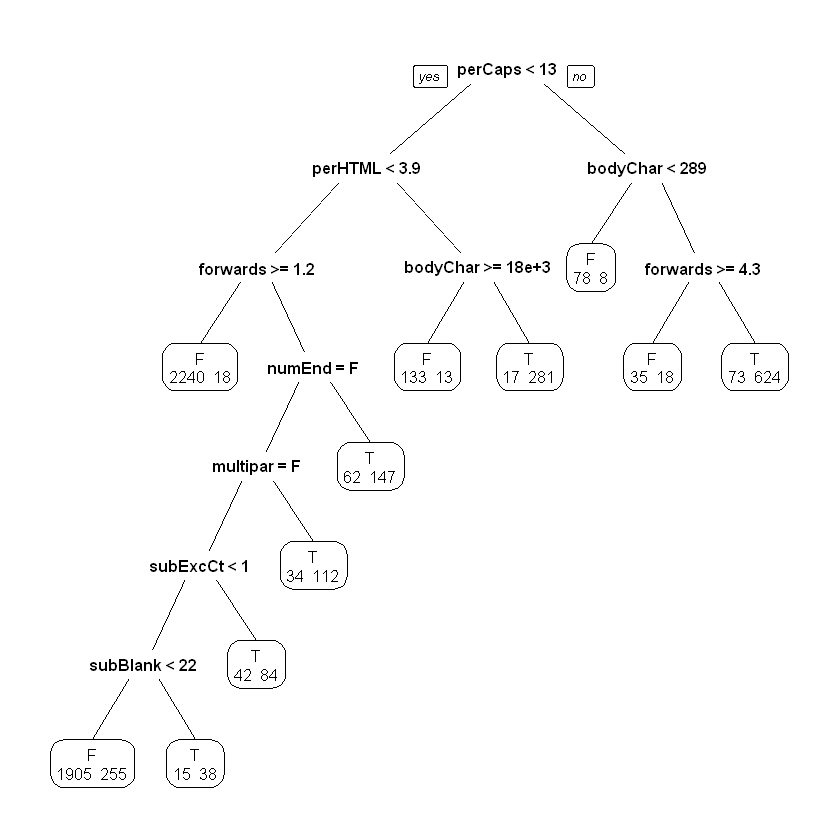

[1] "Minsplit Value:  200"


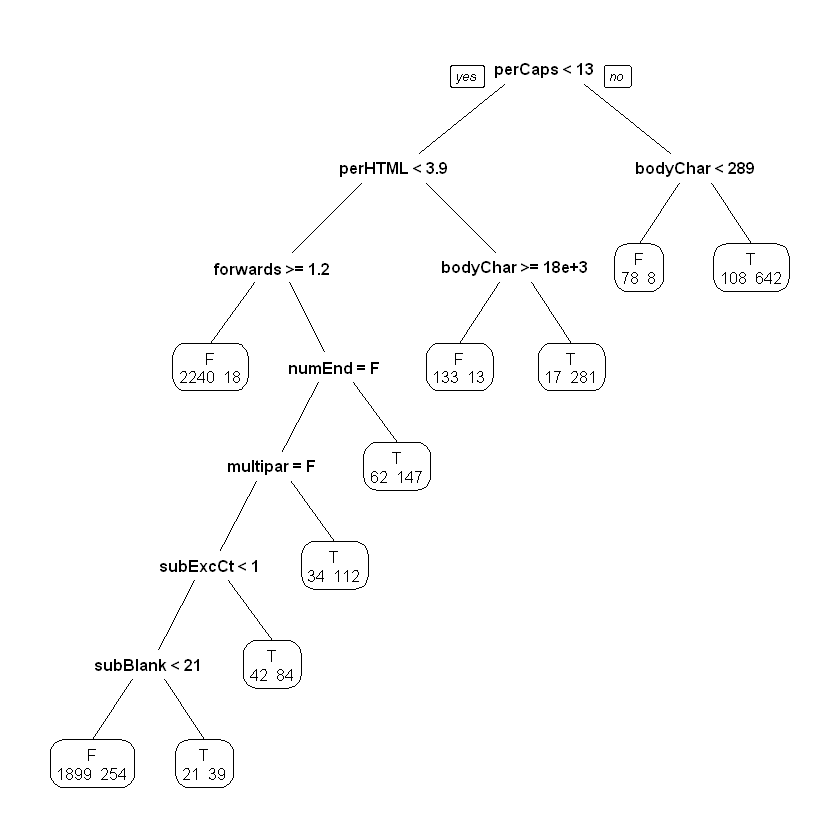

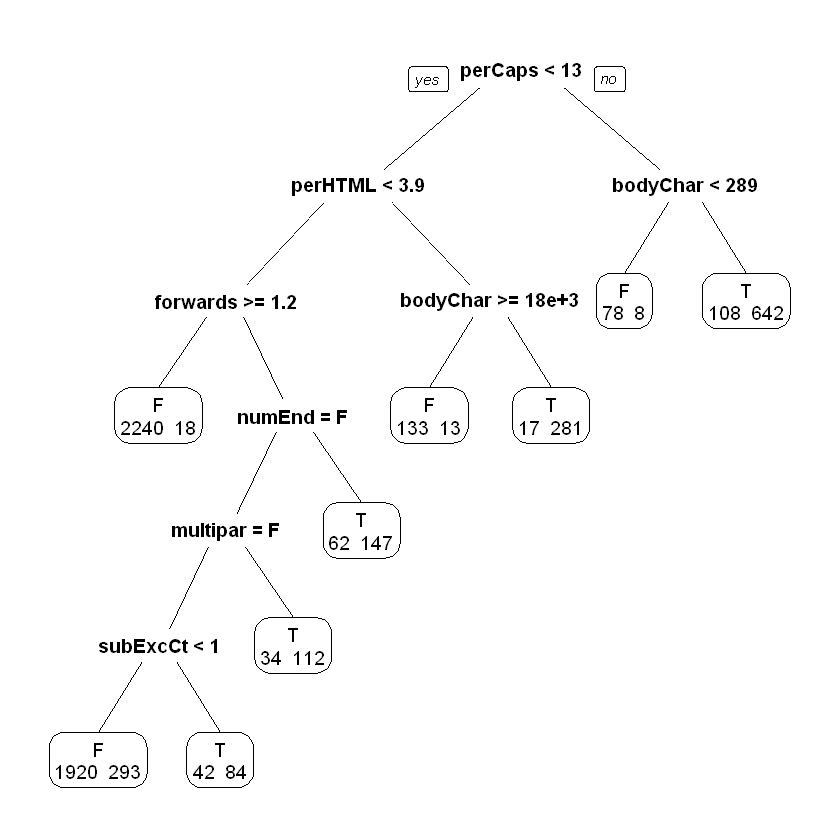

In [13]:
result <- exploreMinSplitEffect(testFeatures, testLabels)

In [14]:
result

MinSplit,Precision,Recall,F1-Score
20,0.8435544,0.8435544,0.8435544
40,0.8435544,0.8435544,0.8435544
60,0.8435544,0.8435544,0.8435544
80,0.8435544,0.8435544,0.8435544
100,0.8386277,0.8260325,0.8322825
120,0.8236745,0.8360451,0.8298137
140,0.8170267,0.8047559,0.8108449
160,0.8151476,0.7947434,0.8048162
180,0.8002466,0.8122653,0.8062112
200,0.8005083,0.7884856,0.7944515


As expected our tree's complexity decreased as the value of minsplit increased. We see that precision and recall are constant from a minsplit of 20 to 80 with both being 84.36%, after which both begin to slowly decrease as minsplit increases.

#### Minbucket

The minbucket parameter is very similar to the minsplit parameter. Where the minsplit parameter determines the number of required classified observations in a node before a split can happen, minbucket restricts the split if the resulting node has fewer observations that the minbucket value. The purpose of this parameter attempts to minimize child nodes that have few observations which would suggest that the model has overfit the data and will not generalize well to new data. The relationship between minsplit and minbucket affect each other such that the default minbuckete value is set to minsplit/3. This ensures that minbucket doesn't prohibit any splits. As with minsplit, as the value increases it will create less complex trees because the number of splits on the data is eventually restricted.

[1] "Minbucket Value:  10"
[1] "Minbucket Value:  20"
[1] "Minbucket Value:  30"
[1] "Minbucket Value:  40"


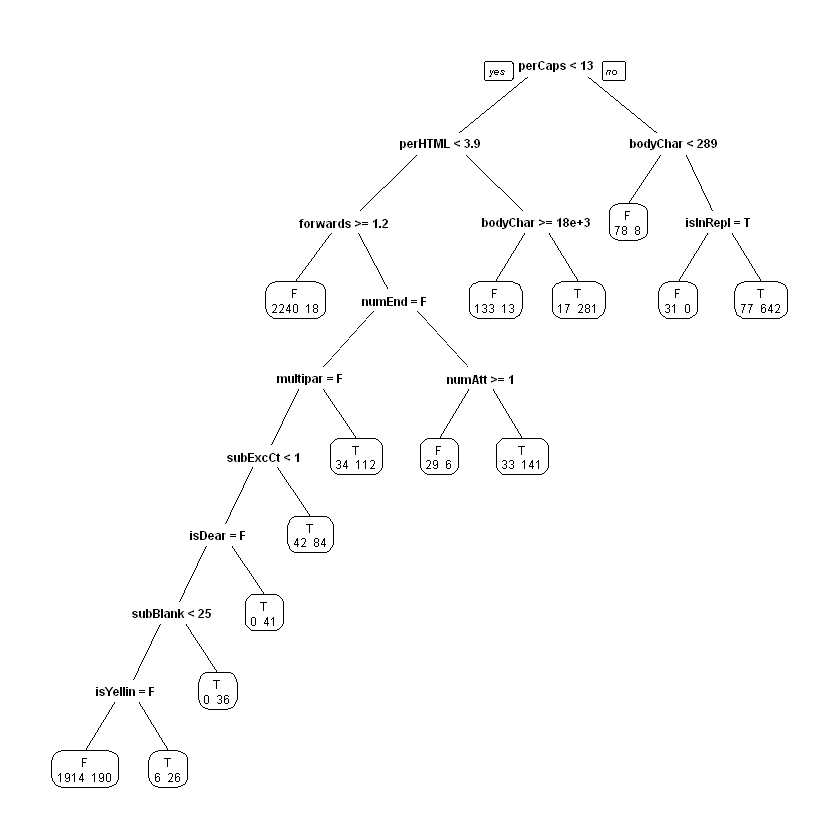

[1] "Minbucket Value:  50"


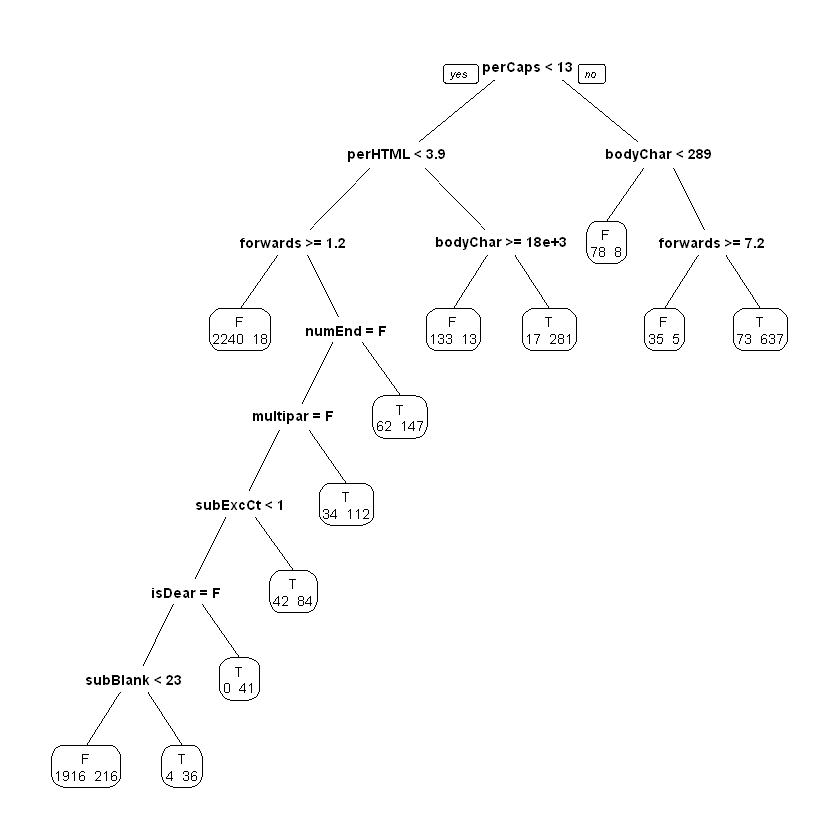

[1] "Minbucket Value:  60"


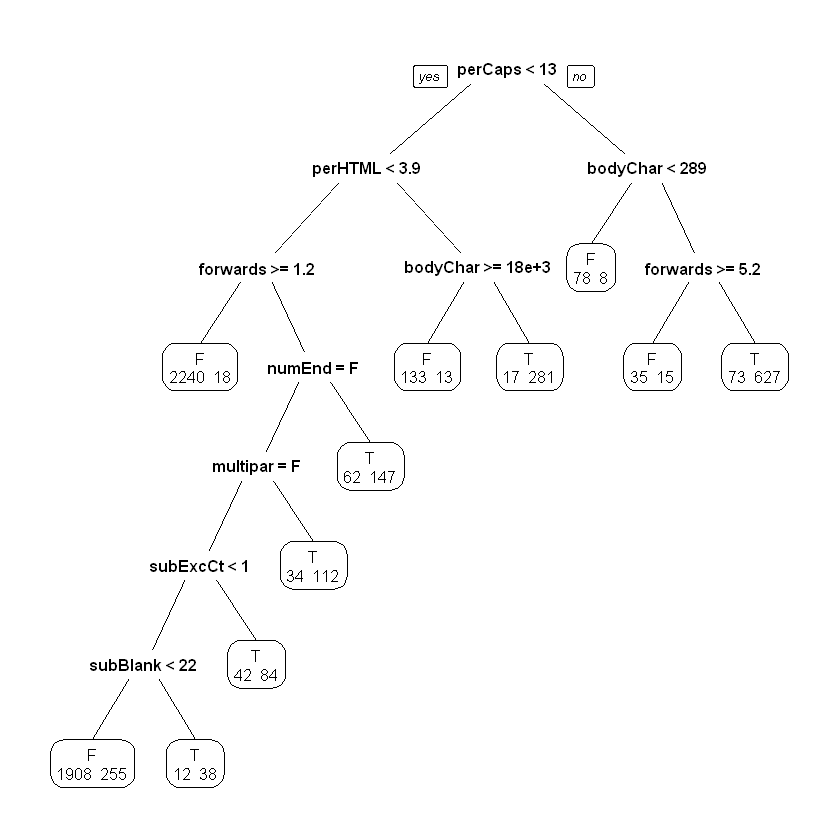

[1] "Minbucket Value:  70"


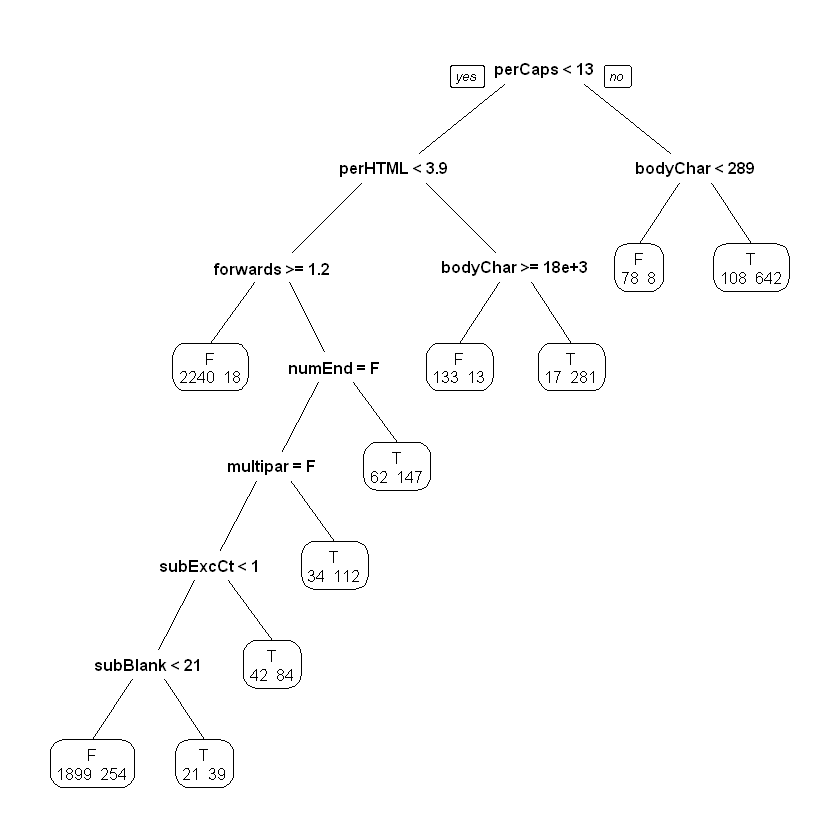

[1] "Minbucket Value:  80"
[1] "Minbucket Value:  90"


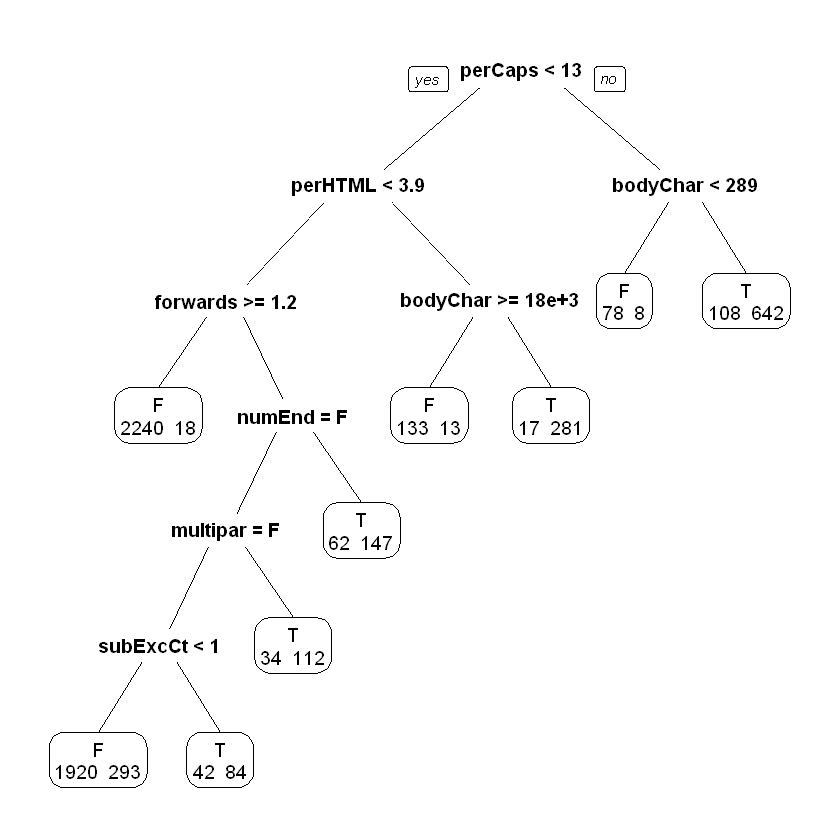

[1] "Minbucket Value:  100"


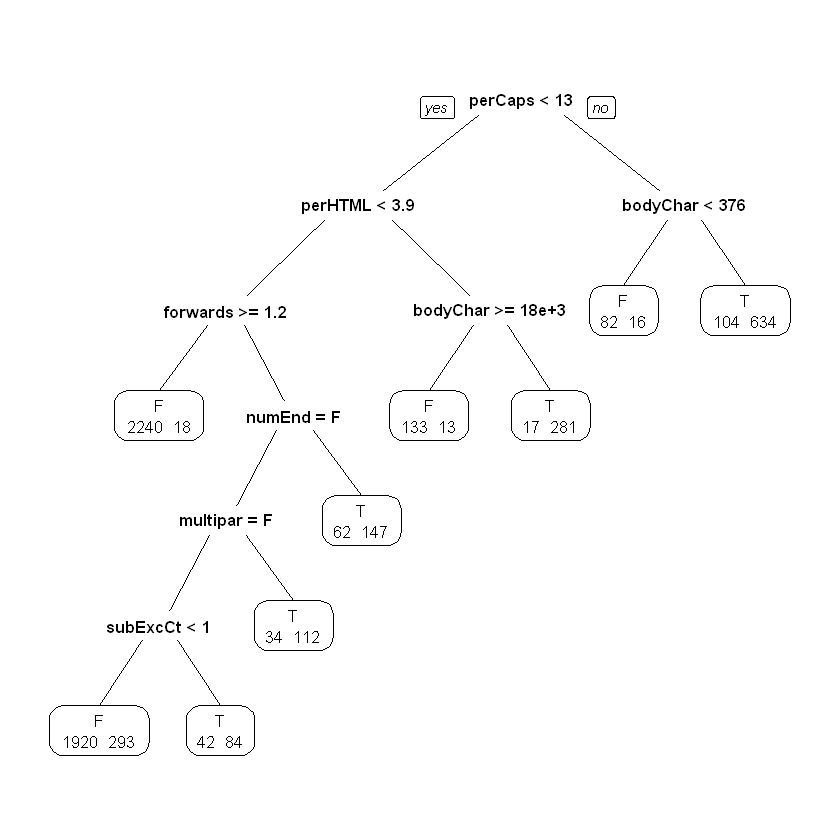

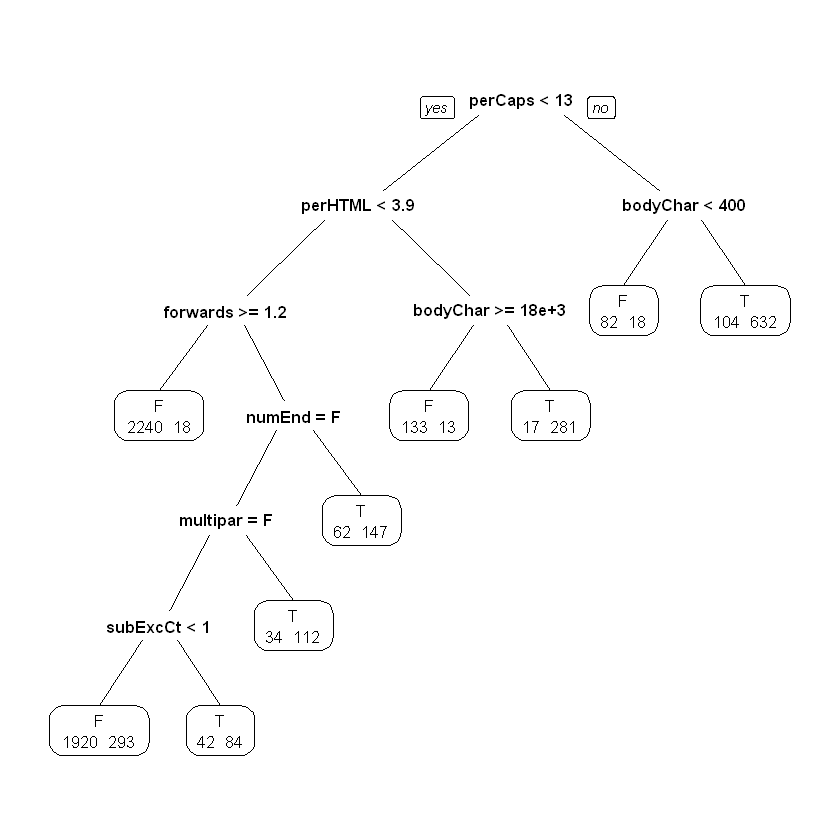

In [15]:
result <- exploreMinBucketEffect(testFeatures, testLabels)

In [16]:
result

MinBucket,Precision,Recall,F1-Score
10,0.8435544,0.8435544,0.8435544
20,0.8435544,0.8435544,0.8435544
30,0.8435544,0.8435544,0.8435544
40,0.8236745,0.8360451,0.8298137
50,0.8165605,0.8022528,0.8093434
60,0.8002466,0.8122653,0.8062112
70,0.8005083,0.7884856,0.7944515
80,0.8005083,0.7884856,0.7944515
90,0.8020434,0.7859825,0.7939317
100,0.8015365,0.7834793,0.7924051


As expected the tree's complexity decreased by increasing the minbucket but the precision score decreased. We see our highest precision is at 84.36% for a minbucket between 10 to 30 before it decreases as minbucket increases (and complexity decreases).

#### Xval

Xval is simply the number (x) of cross validations to be carried out on the data. For very large data sets it is common for this to be as low as 3, where normally it is set to between 5 and 10 but with limiting returns past 5. Cross validation is a way to partition the data into x-folds (normally called k-folds but since the argument is 'xval' we will call it x here) to train your model on all partitions but one, and test it against the last partition. This helps models improve its ability to generalize (limit bias) to data that is not currently available (maybe a test data set where response variables are available, or to completely new data without response variables). Increasing xval will drastically increase computational time, for example increasing from 0 to 10 would increase computational time 11-fold.

[1] "Xval Value:  1"
[1] "Xval Value:  2"
[1] "Xval Value:  3"
[1] "Xval Value:  4"
[1] "Xval Value:  5"
[1] "Xval Value:  6"
[1] "Xval Value:  7"
[1] "Xval Value:  8"
[1] "Xval Value:  9"
[1] "Xval Value:  10"


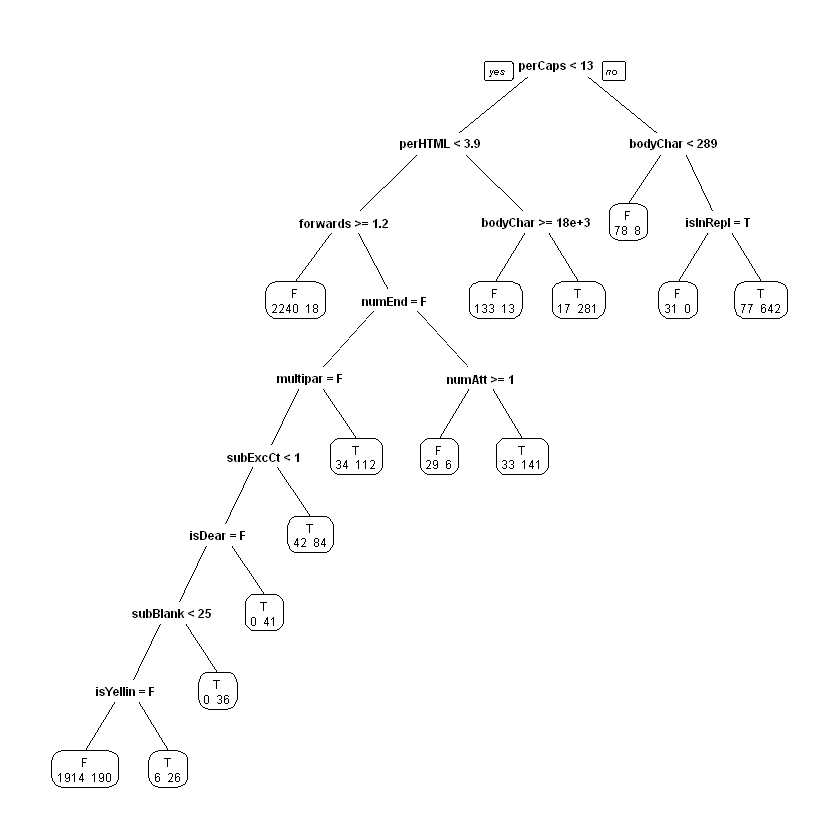

In [17]:
result <- exploreXvalEffect(testFeatures, testLabels)

In [18]:
result

XVal,Precision,Recall,F1-Score
1,0.8435544,0.8435544,0.8435544
2,0.8435544,0.8435544,0.8435544
3,0.8435544,0.8435544,0.8435544
4,0.8435544,0.8435544,0.8435544
5,0.8435544,0.8435544,0.8435544
6,0.8435544,0.8435544,0.8435544
7,0.8435544,0.8435544,0.8435544
8,0.8435544,0.8435544,0.8435544
9,0.8435544,0.8435544,0.8435544
10,0.8435544,0.8435544,0.8435544


For this dataset the amount of cross validation did not effect the scores.

#### Cp

Like minbucket, the cp (complexity parameter) value places constraints on the ability for a node to split. If a node splits and the gini metric does not improve by the cp value then the split is rejected. Therefore, the smaller the cp value the more complex a tree can become. The max value of cp is 1 which would create a tree with no splits.

[1] "CP Value:  1e-04"
[1] "CP Value:  0.0101"


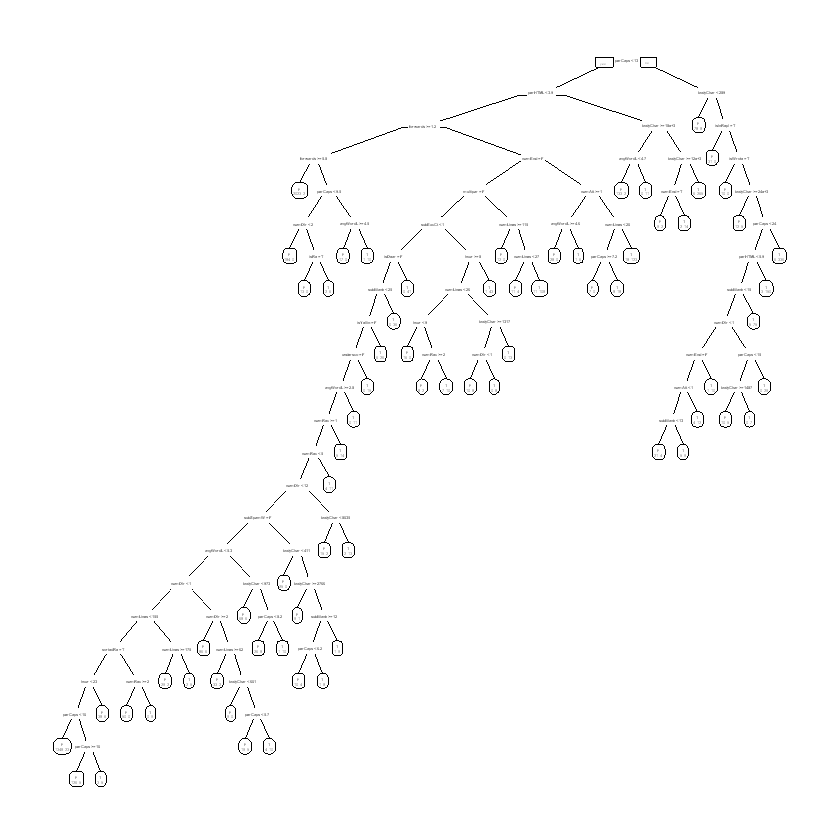

[1] "CP Value:  0.0201"


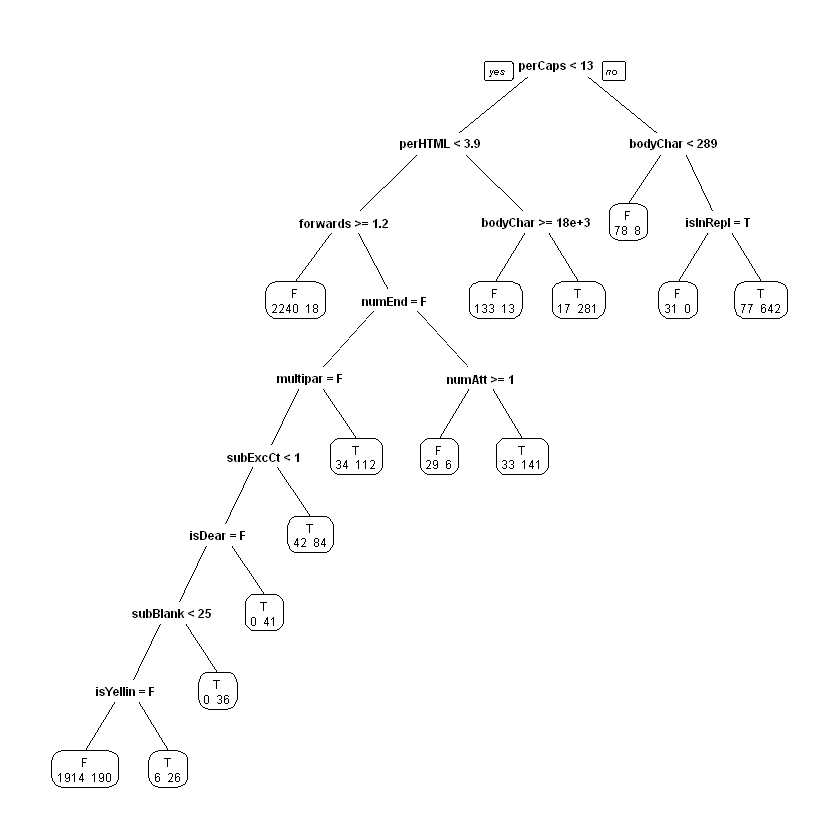

[1] "CP Value:  0.0301"


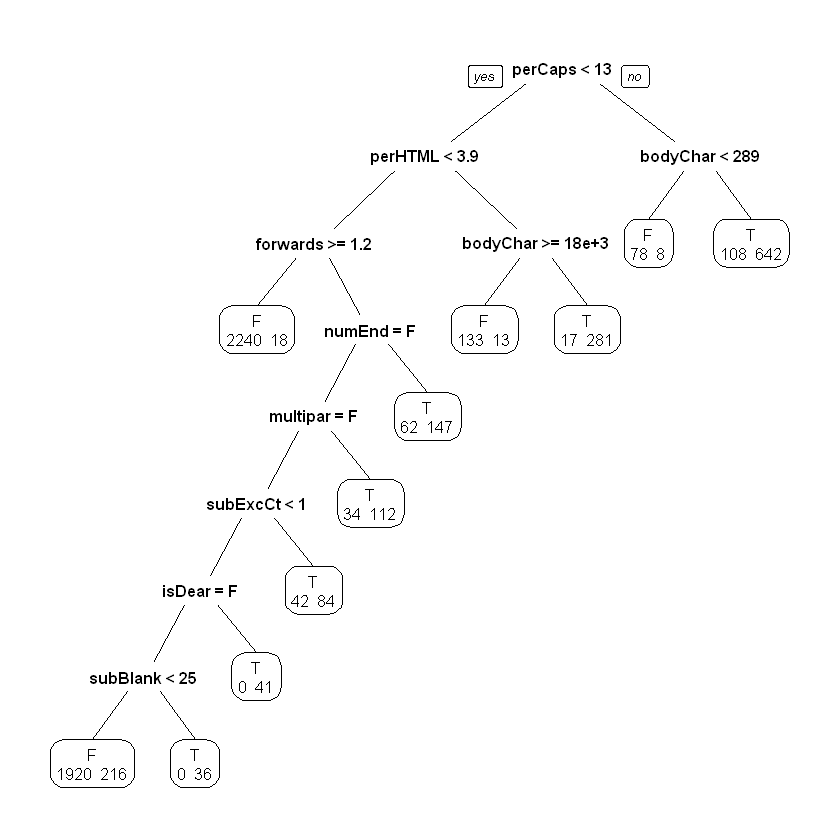

[1] "CP Value:  0.0401"
[1] "CP Value:  0.0501"


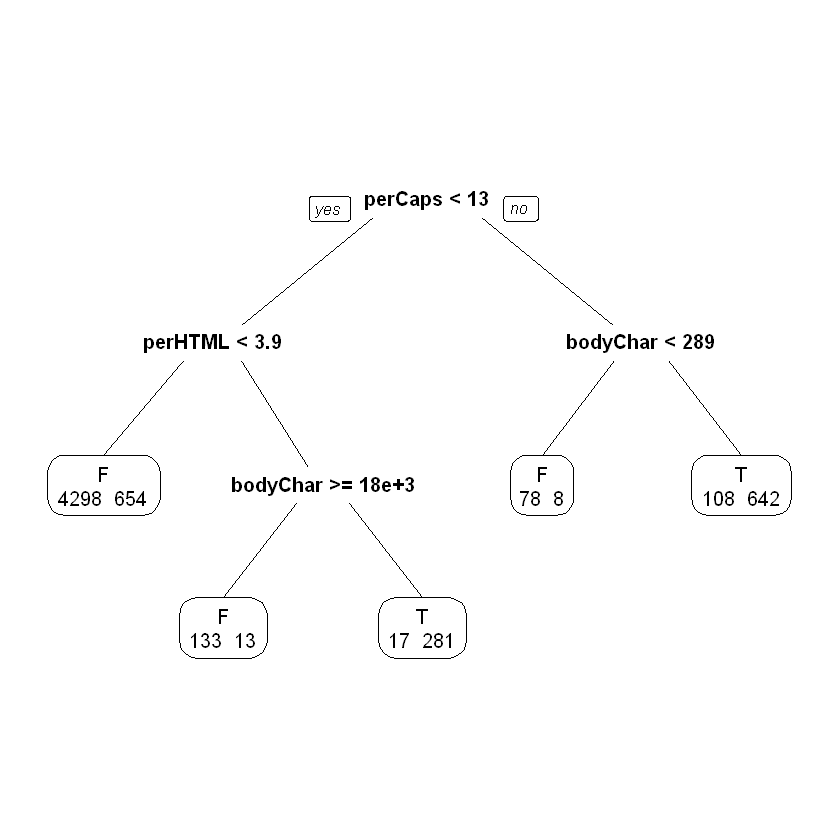

[1] "CP Value:  0.0601"
[1] "CP Value:  0.0701"
[1] "CP Value:  0.0801"


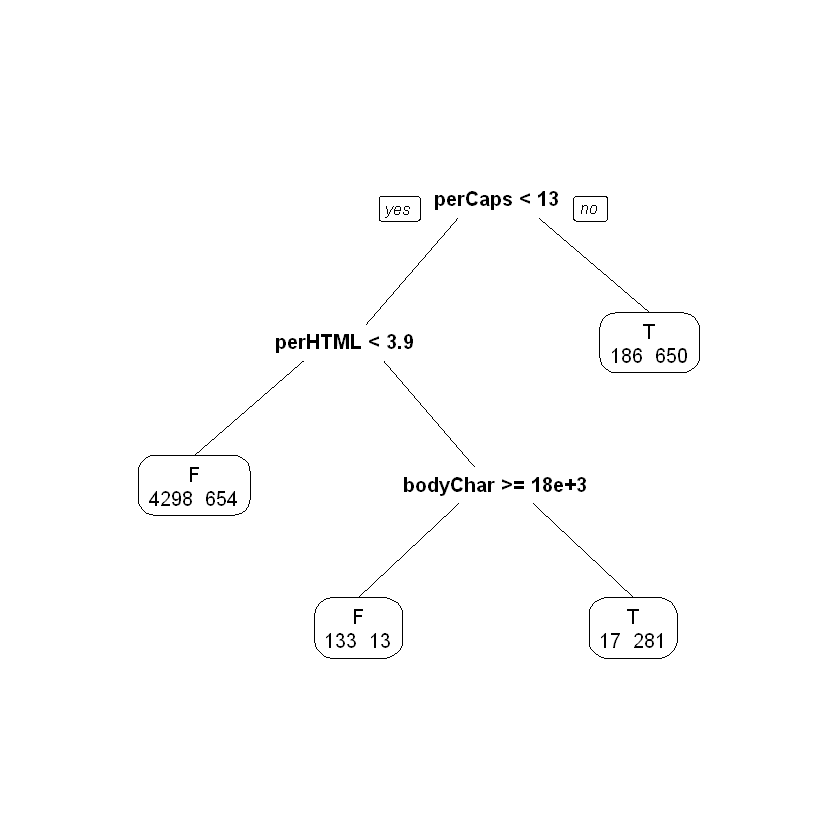

[1] "CP Value:  0.0901"


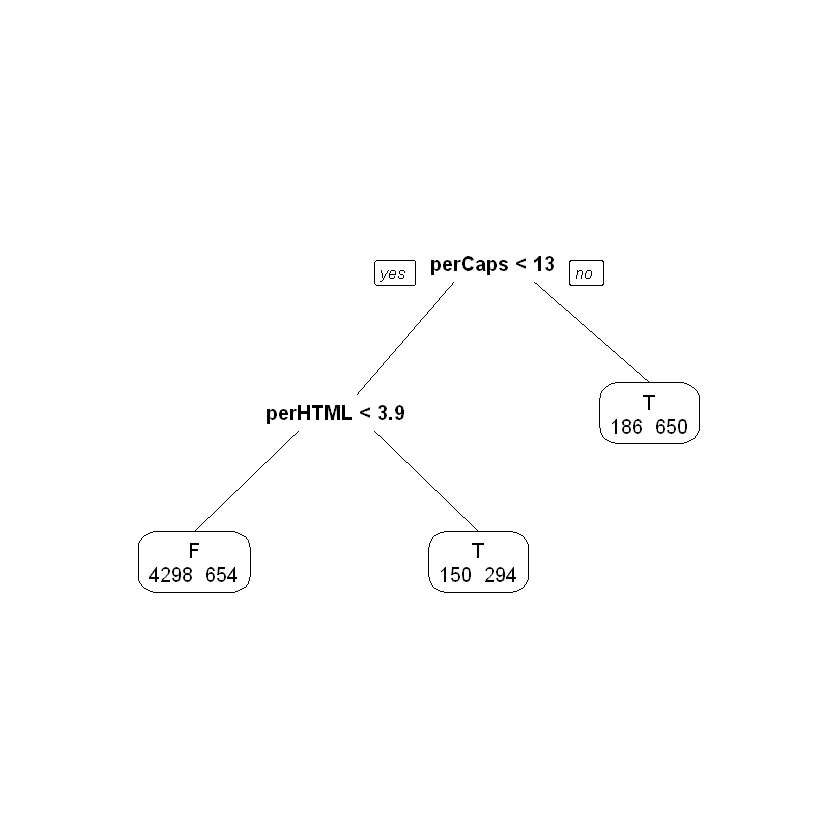

In [19]:
result <- exploreCpEffect(testFeatures, testLabels)

In [20]:
result

CP,Precision,Recall,F1-Score
0.0001,0.8770186,0.8836045,0.8802993
0.0101,0.8435544,0.8435544,0.8435544
0.0201,0.8101572,0.8385482,0.8241082
0.0301,0.8619403,0.5782228,0.6921348
0.0401,0.8619403,0.5782228,0.6921348
0.0501,0.8120690,0.5894869,0.6831037
0.0601,0.8120690,0.5894869,0.6831037
0.0701,0.8120690,0.5894869,0.6831037
0.0801,0.7421875,0.5944931,0.6601807
0.0901,0.7421875,0.5944931,0.6601807


We see that the smallest cp value (0.0001) yields the most complex tree along with the highest perceision. With a tree this complex we would worry about overfitting our current dataset and the model not being nearly as generalizable.

# Results

Now that we've analyzed the hypertuning of each parameter individually to see which values would give us a model with the most precision, we will hypertune them all simultaneously to look for the optimal model. Our previous best model was made by lowering the cp value to 0.0001 to yield a precision of 87.70%. We will apply the same range of parameters used previously into a gridSearch function. This will fit a model for each combination of values and rank the best 5 models with their parameters used and their score.

In [21]:
gridSearch <- runGridSearch()

gridSearch[c(1,2,3,4,5), c(1,2,3,4,6,7,8,9)]

Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

cp,minsplit,maxdepth,minbucket,test_accuracy,precision,recall,f1
0.0011,20,12,10,0.9364570,0.9022758,0.8435544,0.8719276
0.0001,20,10,10,0.9361361,0.9010695,0.8435544,0.8713639
0.0001,40,10,10,0.9322850,0.9005450,0.8272841,0.8623614
0.0001,60,10,10,0.9322850,0.9005450,0.8272841,0.8623614
0.0001,60,12,10,0.9345315,0.9004038,0.8372966,0.8677043


Our best model from our tuned hyperparameter gridSearch had 90.23% precision, an increase of 2.53% over our previous best model of tuning only the cp hyperparameter. Minbucket was the only hyperparameter that remained constant at 10. This means every optimal model needed to allow for terminal nodes to be as small as possible to gain the most precision. The rest of the optimal parameters in the top five models fluctuated between the smallest or second smallest values available except for minsplit which had three of the smallest values (20, 40, 60). This shows that while the minimal values for every parameter was not quite the optimal model (by 0.11%) it would have been a very good initial guess for what the optimal model would be.

# Discussion

While a 90.23% precision is very respectful, our model is limited due to being only one decision tree. More advanced algorithms employ ensemble techniques that utilize 10, 100, or more decision trees like RandomForest. These would surely increase the precision of our model although there would be a tradeoff in computation time. This might not be an issue for smaller email services but when it is scaled to a size of gmail this could be a challenge even though email does not need to be transferred from sender to receiver instantaneously.

Another way of increasing our precision could be to acquire a larger dataset to train our models on. More importantly than a larger dataset though would be to have a more updated dataset. Newer SPAM emails would be able to more easily slip through a SPAM filter built on older SPAM emails as they are constantly tweaked to try to gain access to user's inboxes. This cat and mouse game occurs in all aspects of life. A malicious entity could easily find research on the topic as we have done here and ensured the main deterministic feature in determining SPAM (percent of capitalized letters) is decreased drastically as to lessen the precision of any SPAM filter. This is why constantly increasing an updated training set by marking SPAM emails that do come into your email inbox is so important. By designating an email as SPAM you are giving the SPAM filter algorithm more data to train on so it can be updated and become more precise.

### Sources

- Nolan, Debra. "Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving."
- http://rdatasciencecases.org/
- https://www.rdocumentation.org/
- https://cran.r-project.org/web/packages/rpart/rpart.pdf
- https://cran.r-project.org/web/packages/rpart/vignettes/longintro.pdf
- https://blogs.msdn.microsoft.com/andreasderuiter/2015/02/09/performance-measures-in-azure-ml-accuracy-precision-recall-and-f1-score/
- https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf
- https://rpubs.com/JiawenQi/GridSearchIris


# Our Code

In [2]:
testFeatures = testDF[, names(testDF) != "isSpam"]
testLabels = testDF[, names(testDF) == "isSpam"]

In [3]:
exploreMaxDepthEffect <- function(testFeatures, testLabels) {
    maxDepth <- seq(from = 2, to = 20, by = 2)

    result <- data.frame()

    for (value in maxDepth) {
        rpartObj = rpart(isSpam ~ ., data = trainDF, method="class", control = rpart.control(maxdepth=value) )

        print(paste("Max Depth Value: ", toString(value)))

        prp(rpartObj, extra = 1)       

        predicted <- predict(rpartObj, newdata = testFeatures, type = "class")

        p <- Precision(y_pred = predicted, y_true = testLabels, positive = "T")
        r <- Recall(y_pred = predicted, y_true = testLabels, positive = "T")
        f1 <- F1_Score(y_pred = predicted, y_true = testLabels, positive = "T")

        tmpResult <- c(value, p, r, f1)
        result <- rbind(result, tmpResult)
    }
    
    names(result) <- c("Max Depth", "Precision", "Recall", "F1-Score")
    return(result)
}

In [4]:
exploreMinSplitEffect <- function(testFeatures, testLabels) {
    minSplit <- seq(from = 20, to = 200, by = 20)

    result <- data.frame()

    for (value in minSplit) {
        rpartObj = rpart(isSpam ~ ., data = trainDF, method="class", control = rpart.control(minsplit=value) )

        print(paste("Minsplit Value: ", toString(value)))

        prp(rpartObj, extra = 1)       

        predicted <- predict(rpartObj, newdata = testFeatures, type = "class")

        p <- Precision(y_pred = predicted, y_true = testLabels, positive = "T")
        r <- Recall(y_pred = predicted, y_true = testLabels, positive = "T")
        f1 <- F1_Score(y_pred = predicted, y_true = testLabels, positive = "T")

        tmpResult <- c(value, p, r, f1)
        result <- rbind(result, tmpResult)
    }
    
    names(result) <- c("MinSplit", "Precision", "Recall", "F1-Score")
    return(result)
}

In [5]:
exploreMinBucketEffect <- function(testFeatures, testLabels) {
    minBucket <- seq(from = 10, to = 100, by = 10)

    result <- data.frame()

    for (value in minBucket) {
        rpartObj = rpart(isSpam ~ ., data = trainDF, method="class", control = rpart.control(minbucket=value) )

        print(paste("Minbucket Value: ", toString(value)))

        prp(rpartObj, extra = 1)       

        predicted <- predict(rpartObj, newdata = testFeatures, type = "class")

        p <- Precision(y_pred = predicted, y_true = testLabels, positive = "T")
        r <- Recall(y_pred = predicted, y_true = testLabels, positive = "T")
        f1 <- F1_Score(y_pred = predicted, y_true = testLabels, positive = "T")

        tmpResult <- c(value, p, r, f1)
        result <- rbind(result, tmpResult)
    }
    
    names(result) <- c("MinBucket", "Precision", "Recall", "F1-Score")
    return(result)
}

In [6]:
exploreXvalEffect <- function(testFeatures, testLabels) {
    xVal <- seq(from = 1, to = 10, by = 1)

    result <- data.frame()

    for (value in xVal) {
        rpartObj = rpart(isSpam ~ ., data = trainDF, method="class", control = rpart.control(xval=value))

        print(paste("Xval Value: ", toString(value)))

        prp(rpartObj, extra = 1)       

        predicted <- predict(rpartObj, newdata = testFeatures, type = "class")

        p <- Precision(y_pred = predicted, y_true = testLabels, positive = "T")
        r <- Recall(y_pred = predicted, y_true = testLabels, positive = "T")
        f1 <- F1_Score(y_pred = predicted, y_true = testLabels, positive = "T")

        tmpResult <- c(value, p, r, f1)
        result <- rbind(result, tmpResult)
    }
    names(result) <- c("XVal", "Precision", "Recall", "F1-Score")
    return(result)
}

In [7]:
exploreCpEffect <- function(testFeatures, testLabels) {
    cpSeq <- seq(from = .0001, to = .1, by = .01)

    result <- data.frame()

    for (value in cpSeq) {
        rpartObj = rpart(isSpam ~ ., data = trainDF, method="class", control = rpart.control(cp=value))

        print(paste("CP Value: ", toString(value)))

        prp(rpartObj, extra = 1)       

        predicted <- predict(rpartObj, newdata = testFeatures, type = "class")

        p <- Precision(y_pred = predicted, y_true = testLabels, positive = "T")
        r <- Recall(y_pred = predicted, y_true = testLabels, positive = "T")
        f1 <- F1_Score(y_pred = predicted, y_true = testLabels, positive = "T")

        tmpResult <- c(value, p, r, f1)
        result <- rbind(result, tmpResult)
    }
    names(result) <- c("CP", "Precision", "Recall", "F1-Score")
    return(result)
}

In [10]:
#install.packages(c("caret","tidyverse","MLmetrics"))
library(rpart)
library(caret)
library(tidyverse)
library(MLmetrics)

metricResults <- function(predicted, test_labels) {
    tmpResult <- tibble()
    
    tmpResult <- tmpResult %>% mutate(precision = Precision(y_pred = predicted, y_true = test_labels, positive = "T"))
    tmpResult <- tmpResult %>% mutate(recall = Recall(y_pred = predicted, y_true = test_labels, positive = "T"))
    tmpResult <- tmpResult %>% mutate(f1 = F1_Score(y_pred = predicted, y_true = test_labels, positive = "T"))
    
    return(tmpResult)
}

compute_accuracy <- function(fit, test_features, test_labels) {
  predicted <- predict(fit, test_features, type = "class")
  mean(predicted == test_labels)
}

compute_precision <- function(fit, test_features, test_labels) {
    predicted <- predict(fit, test_features, type = "class")
    p <- Precision(y_pred = predicted, y_true = test_labels, positive = "T")
}

compute_recall <- function(fit, test_features, test_labels) {
    predicted <- predict(fit, test_features, type = "class")
    r <- Recall(y_pred = predicted, y_true = test_labels, positive = "T")
}

compute_f1 <- function(fit, test_features, test_labels) {
    predicted <- predict(fit, test_features, type = "class")
    f1 <- F1_Score(y_pred = predicted, y_true = test_labels, positive = "T")
}

In [9]:
runGridSearch <- function() {
    cpVal <- seq(from = .0001, to=0.01, by=0.001)
    maxDepth <- seq(from = 2, to = 20, by = 2)
    minSplit <- seq(from = 20, to = 200, by = 20)
    minBucket <- seq(from = 10, to = 100, by = 10)
    xVal <- seq(from = 1, to = 10, by = 1)

    gridSearch = list(cp = cpVal,
                      minsplit = minSplit,
                      maxdepth = maxDepth,
                      minbucket = minBucket) %>% cross_df()

    mod <- function(...) {
        rpart(isSpam ~ ., data = trainDF, method = "class", control = rpart.control(...))
    }
    
    gridSearch <- gridSearch  %>% mutate(fit = pmap(gridSearch, mod))
    
    gridSearch <- gridSearch %>% mutate(test_accuracy = map_dbl(fit, compute_accuracy, testFeatures, testLabels))
    gridSearch <- gridSearch %>% mutate(precision = map_dbl(fit, compute_precision, testFeatures, testLabels))
    gridSearch <- gridSearch %>% mutate(recall = map_dbl(fit, compute_recall, testFeatures, testLabels))
    gridSearch <- gridSearch %>% mutate(f1 = map_dbl(fit, compute_f1, testFeatures, testLabels))
    gridSearch <- gridSearch %>% arrange(desc(precision))
    
    return(gridSearch)
}

# Professor Slater's Code

library(rpart)
rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class", 
                 control = rpart.control(minsplit = 20, maxdepth = 20, minbucket = 10, cp = .000))

library(rpart.plot)

prp(rpartFit, extra = 1)

library(rpart.plot)
#pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

prp(rpartFit, extra = 1)
#dev.off()

predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })



#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

#dev.off()

Text around the altered models per parameter:
credit for below: https://cran.r-project.org/web/packages/rpart/rpart.pdf
credit for below, and for more thorough explanations of rpart: https://cran.r-project.org/web/packages/rpart/vignettes/longintro.pdf

save(emailDFrp,file="data.Rda")

library(caret)

## Ok so first of all our data is in T/F 'factors'.  
We need to change it to numbers.  And as it turns out, there are quite a few NANs as well.  Let's set those to zero because imputation was 9 weeks ago

setupRnum = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.numeric(x)
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFnum = setupRnum(emailDF)

emailDFnum[is.na(emailDFnum)]<-0

## I think i may skip this and see if I can get the folds to work internally to caret
However, one way to define your folds is to set a seed, and have your folds in a list that you can pass on to others to get the same splits.


cv_folds <- createFolds(emailDFnum$isSpam, k=5, list=TRUE, returnTrain = TRUE)
lengths(cv_folds)

## Finally Metric Stuff
Because our authors prefer Type I/II errors, but the cool kids know that precision/recall/F1 is where its at, while the default of caret is accuracy and kappa.  To get us all on the same page, I create a function that returns the metrics we want.  However, rather than re-invent the wheel, I just install a package.  I am not sure if it had Type I/II errors so those I made my self.  \#MLSwag

library(MLmetrics)
f1 <- function(data, lev = NULL, model = NULL) {
  f1_val <- F1_Score(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  p <- Precision(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  r <- Recall(y_pred = data$pred, y_true = data$obs, positive = lev[1])
  fp <-sum(data$pred==0 & data$obs==1)/length(data$pred)  
 
  fn <-sum(data$pred==1 & data$obs==0)/length(data$pred)
    c(F1 = f1_val,
    prec = p,
    rec = r,
    Type_I_err=fp,
    Type_II_err=fn
   )
}

ok so lets get the naive bayes packages installed. (first 2 lines)
The next line makes a dataframe of all the parameters to check.  
If you don't know what they are, look them up
https://topepo.github.io/caret/available-models.html

Then we create a trainControl object.  It tells caret how to train--using a cross-validation ('cv') with 3 folds in this case (number = 3).  We want the final predictions of the best model and our summary is the custom function from above.

Then we create our model: "model_nb".  We user the caret::train method.  We make 'isSpam' a factor because R is dumb and can't figure out that 1 and 0 are classes.  
*as.factor(isSpam) ~ .*  means Y=as.factor(isSpam), X=everything else.
    
*method* is the package we are using, and we pass our tuning grid.

library(naivebayes)
library(e1071)
nb_grid<-expand.grid(laplace=c(0,0.1,0.3,0.5,1), usekernel=c(T,F), adjust=c(T,F))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_nb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='naive_bayes',tuneGrid = nb_grid)
model_nb

#Did the boss fool us with the folds?  Nope.
table(model_nb$pred['Resample'])

val<-seq(from = 0, to=0.01, by=0.0005)
cart_grid <- expand.grid(cp = val, minsplit = c(10, 20, 30, 40), maxdepth = c(5, 10, 15, 20, 30), minbucket = c(3, 7, 10, 13))
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ ., data=emailDFnum, trControl = train_control, method='rpart', tuneGrid = cart_grid)
model_rpart

val<-seq(from = 0, to=0.01, by=0.0005)
library(rpart)
cart_grid<-expand.grid(cp=val)
train_control<-trainControl(method="cv", number =5, savePredictions = 'final',summaryFunction = f1)
model_rpart<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, method='rpart',tuneGrid = cart_grid)
model_rpart

library(randomForest)
rf_grid<-expand.grid(mtry=seq(from =1, to = 25, by = 2))
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_rf<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control, ntree=200,method='rf',tuneGrid = rf_grid)
model_rf

library(xgboost)
xgb_grid<-expand.grid(nrounds = 100, max_depth = c(3,5,7,9,11), eta = c(0.01,0.03,0.1), gamma=c(1,3,5,10), colsample_bytree=1, min_child_weight=1, subsample=1)
train_control<-trainControl(method="cv", number=3, savePredictions = 'final',summaryFunction = f1)
model_xgb<-caret::train(as.factor(isSpam) ~ .,data=emailDFnum, trControl = train_control,method='xgbTree',tuneGrid = xgb_grid)
model_xgb

# Code from Book

#spamPath = system.file(package = "RSpamData")
#spamPath = "/Users/nolan/RPackages/RSpamData"spamPath = "."
spamPath = "./SpamAssassinMessages/"
#list.dirs(spamPath, full.names = FALSE)



list.files(path = paste(spamPath, "messages", 
                        sep = .Platform$file.sep))



list.files(path = paste(spamPath,'spam', sep=.Platform$file.sep))

head(list.files(path = paste(spamPath, "messages", "spam_2",
                             sep = .Platform$file.sep)))

dirNames = list.files(path = paste(spamPath, "messages", 
                      sep = .Platform$file.sep))
length(list.files(paste(spamPath, "messages", dirNames, 
                        sep = .Platform$file.sep)))

sapply(paste(spamPath, "messages", dirNames, 
             sep = .Platform$file.sep), 
       function(dir) length(list.files(dir)) )

fullDirNames = paste(spamPath, "messages", dirNames, 
                     sep = .Platform$file.sep)

fileNames = list.files(fullDirNames[1], full.names = TRUE)
fileNames[1]

msg = readLines(fileNames[1])
head(msg)

indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]
sampleEmail = sapply(fn, readLines)        

msg = sampleEmail[[1]]
which(msg == "")[1]

match("", msg)

splitPoint = match("", msg)

msg[ (splitPoint - 2):(splitPoint + 6) ]

header = msg[1:(splitPoint-1)]
body = msg[ -(1:splitPoint) ]

splitMessage = function(msg) {
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))
}

sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
grep("Content-Type", header)

grep("multi", tolower(header[46]))

header[46]

headerList = lapply(sampleSplit, function(msg) msg$header)
CTloc = sapply(headerList, grep, pattern = "Content-Type")
CTloc

sapply(headerList, function(header) {
                       CTloc = grep("Content-Type", header)
                       if (length(CTloc) == 0) return(NA)
                       CTloc
                   })

hasAttach = sapply(headerList, function(header) {
  CTloc = grep("Content-Type", header)
  if (length(CTloc) == 0) return(FALSE)
  grepl("multi", tolower(header[CTloc])) 
})

hasAttach

header = sampleSplit[[6]]$header
boundaryIdx = grep("boundary=", header)
header[boundaryIdx]

sub(".*boundary=\"(.*)\";.*", "\\1", header[boundaryIdx])

header2 = headerList[[9]]
boundaryIdx2 = grep("boundary=", header2)
header2[boundaryIdx2]

sub('.*boundary="(.*)";.*', "\\1", header2[boundaryIdx2])

boundary2 = gsub('"', "", header2[boundaryIdx2])

sub(".*boundary= *(.*);?.*", "\\1", boundary2)

boundary = gsub('"', "", header[boundaryIdx])
sub(".*boundary= *(.*);?.*", "\\1", boundary)

sub(".*boundary= *([^;]*);?.*", "\\1", boundary)

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

sampleSplit[[6]]$body

boundary = getBoundary(headerList[[15]]) 
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

msg = body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)]
tail(msg)

msg = c(msg, body[ (eStringLoc + 1) : length(body) ])
tail(msg)

dropAttach = function(body, boundary){
  
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  
  if (length(bStringLocs) <= 1) return(body)
  
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  if (length(eStringLoc) == 0) 
    return(body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1)])
  
  n = length(body)
  if (eStringLoc < n) 
     return( body[ c( (bStringLocs[1] + 1) : (bStringLocs[2] - 1), 
                    ( (eStringLoc + 1) : n )) ] )
  
  return( body[ (bStringLocs[1] + 1) : (bStringLocs[2] - 1) ])
}

head(sampleSplit[[1]]$body)

msg = sampleSplit[[3]]$body
head(msg)

msg[ c(1, 3, 26, 27) ]

cleanMsg = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", msg))
cleanMsg[ c(1, 3, 26, 27) ]

#install.packages("tm")
library(tm)
stopWords = stopwords()
cleanSW = tolower(gsub("[[:punct:]0-9[:blank:]]+", " ", stopWords))
SWords = unlist(strsplit(cleanSW, "[[:blank:]]+"))
SWords = SWords[ nchar(SWords) > 1 ]
stopWords = unique(SWords)

words = unlist(strsplit(cleanMsg, "[[:blank:]]+"))

words = words[ nchar(words) > 1 ]

words = words[ !( words %in% stopWords) ]
head(words)

cleanText =
function(msg)   {
  tolower(gsub("[[:punct:]0-9[:space:][:blank:]]+", " ", msg))
}

findMsgWords = 
function(msg, stopWords) {
 if(is.null(msg))
  return(character())

 words = unique(unlist(strsplit(cleanText(msg), "[[:blank:]\t]+")))
 
 # drop empty and 1 letter words
 words = words[ nchar(words) > 1]
 words = words[ !( words %in% stopWords) ]
 invisible(words)
}

processAllWords = function(dirName, stopWords)
{
       # read all files in the directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email, i.e., cmds
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

  messages = lapply(fileNames, readLines, encoding = "latin1")
  
       # split header and body
  emailSplit = lapply(messages, splitMessage)
       # put body and header in own lists
  bodyList = lapply(emailSplit, function(msg) msg$body)
  headerList = lapply(emailSplit, function(msg) msg$header)
  rm(emailSplit)
  
       # determine which messages have attachments
  hasAttach = sapply(headerList, function(header) {
    CTloc = grep("Content-Type", header)
    if (length(CTloc) == 0) return(0)
    multi = grep("multi", tolower(header[CTloc])) 
    if (length(multi) == 0) return(0)
    multi
  })
  
  hasAttach = which(hasAttach > 0)
  
       # find boundary strings for messages with attachments
  boundaries = sapply(headerList[hasAttach], getBoundary)
  
       # drop attachments from message body
  bodyList[hasAttach] = mapply(dropAttach, bodyList[hasAttach], 
                               boundaries, SIMPLIFY = FALSE)
  
       # extract words from body
  msgWordsList = lapply(bodyList, findMsgWords, stopWords)
  
  invisible(msgWordsList)
}



msgWordsList = lapply(fullDirNames, processAllWords, 
                      stopWords = stopWords) 



numMsgs = sapply(msgWordsList, length)
numMsgs

isSpam = rep(c(FALSE, FALSE, FALSE, TRUE, TRUE), numMsgs)

msgWordsList = unlist(msgWordsList, recursive = FALSE)

numEmail = length(isSpam)
numSpam = sum(isSpam)
numHam = numEmail - numSpam

set.seed(418910)

testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testMsgWords = c((msgWordsList[isSpam])[testSpamIdx],
                 (msgWordsList[!isSpam])[testHamIdx] )
trainMsgWords = c((msgWordsList[isSpam])[ - testSpamIdx], 
                  (msgWordsList[!isSpam])[ - testHamIdx])

testIsSpam = rep(c(TRUE, FALSE), 
                 c(length(testSpamIdx), length(testHamIdx)))
trainIsSpam = rep(c(TRUE, FALSE), 
                 c(numSpam - length(testSpamIdx), 
                   numHam - length(testHamIdx)))

bow = unique(unlist(trainMsgWords))

length(bow)

spamWordCounts = rep(0, length(bow))

names(spamWordCounts) = bow

tmp = lapply(trainMsgWords[trainIsSpam], unique)
tt = table( unlist(tmp) )
spamWordCounts[ names(tt) ] = tt

computeFreqs =
function(wordsList, spam, bow = unique(unlist(wordsList)))
{
   # create a matrix for spam, ham, and log odds
  wordTable = matrix(0.5, nrow = 4, ncol = length(bow), 
                     dimnames = list(c("spam", "ham", 
                                        "presentLogOdds", 
                                        "absentLogOdds"),  bow))

   # For each spam message, add 1 to counts for words in message
  counts.spam = table(unlist(lapply(wordsList[spam], unique)))
  wordTable["spam", names(counts.spam)] = counts.spam + .5

   # Similarly for ham messages
  counts.ham = table(unlist(lapply(wordsList[!spam], unique)))  
  wordTable["ham", names(counts.ham)] = counts.ham + .5  


   # Find the total number of spam and ham
  numSpam = sum(spam)
  numHam = length(spam) - numSpam

   # Prob(word|spam) and Prob(word | ham)
  wordTable["spam", ] = wordTable["spam", ]/(numSpam + .5)
  wordTable["ham", ] = wordTable["ham", ]/(numHam + .5)
  
   # log odds
  wordTable["presentLogOdds", ] = 
     log(wordTable["spam",]) - log(wordTable["ham", ])
  wordTable["absentLogOdds", ] = 
     log((1 - wordTable["spam", ])) - log((1 -wordTable["ham", ]))

  invisible(wordTable)
}

trainTable = computeFreqs(trainMsgWords, trainIsSpam)

newMsg = testMsgWords[[1]]

newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]

present = colnames(trainTable) %in% newMsg

sum(trainTable["presentLogOdds", present]) + 
  sum(trainTable["absentLogOdds", !present])

newMsg = testMsgWords[[ which(!testIsSpam)[1] ]]
newMsg = newMsg[!is.na(match(newMsg, colnames(trainTable)))]
present = (colnames(trainTable) %in% newMsg)
sum(trainTable["presentLogOdds", present]) + 
     sum(trainTable["absentLogOdds", !present])

computeMsgLLR = function(words, freqTable) 
{
       # Discards words not in training data.
  words = words[!is.na(match(words, colnames(freqTable)))]

       # Find which words are present
  present = colnames(freqTable) %in% words

  sum(freqTable["presentLogOdds", present]) +
    sum(freqTable["absentLogOdds", !present])
}

testLLR = sapply(testMsgWords, computeMsgLLR, trainTable)

tapply(testLLR, testIsSpam, summary)


#pdf("SP_Boxplot.pdf", width = 6, height = 6)
spamLab = c("ham", "spam")[1 + testIsSpam]
boxplot(testLLR ~ spamLab, ylab = "Log Likelihood Ratio",
      #  main = "Log Likelihood Ratio for Randomly Chosen Test Messages",
        ylim=c(-500, 500))
#dev.off()


typeIErrorRate = 
function(tau, llrVals, spam)
{
  classify = llrVals > tau
  sum(classify & !spam)/sum(!spam)
}

typeIErrorRate(0, testLLR,testIsSpam)

typeIErrorRate(-20, testLLR,testIsSpam)

typeIErrorRates = 
function(llrVals, isSpam) 
{
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]

  idx = which(!isSpam)
  N = length(idx)
  list(error = (N:1)/N, values = llrVals[idx])
}

typeIIErrorRates = function(llrVals, isSpam) {
    
  o = order(llrVals)
  llrVals =  llrVals[o]
  isSpam = isSpam[o]
    
    
  idx = which(isSpam)
  N = length(idx)
  list(error = (1:(N))/N, values = llrVals[idx])
  }  

xI = typeIErrorRates(testLLR, testIsSpam)
xII = typeIIErrorRates(testLLR, testIsSpam)
tau01 = round(min(xI$values[xI$error <= 0.01]))
t2 = max(xII$error[ xII$values < tau01 ])

#pdf("LinePlotTypeI+IIErrors.pdf", width = 8, height = 6)

library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(xII$error ~ xII$values,  type = "l", col = cols[1], lwd = 3,
     xlim = c(-300, 250), ylim = c(0, 1),
     xlab = "Log Likelihood Ratio Values", ylab="Error Rate")
points(xI$error ~ xI$values, type = "l", col = cols[2], lwd = 3)
legend(x = 50, y = 0.4, fill = c(cols[2], cols[1]),
       legend = c("Classify Ham as Spam", 
                  "Classify Spam as Ham"), cex = 0.8,
       bty = "n")
abline(h=0.01, col ="grey", lwd = 3, lty = 2)
text(-250, 0.05, pos = 4, "Type I Error = 0.01", col = cols[2])

mtext(tau01, side = 1, line = 0.5, at = tau01, col = cols[3])
segments(x0 = tau01, y0 = -.50, x1 = tau01, y1 = t2, 
         lwd = 2, col = "grey")
text(tau01 + 20, 0.05, pos = 4,
     paste("Type II Error = ", round(t2, digits = 2)), 
     col = cols[1])

#dev.off()

k = 5
numTrain = length(trainMsgWords)
partK = sample(numTrain)
tot = k * floor(numTrain/k)
partK = matrix(partK[1:tot], ncol = k)

testFoldOdds = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  trainTabFold = computeFreqs(trainMsgWords[-foldIdx], trainIsSpam[-foldIdx])
  testFoldOdds = c(testFoldOdds, 
               sapply(trainMsgWords[ foldIdx ], computeMsgLLR, trainTabFold))
}

testFoldSpam = NULL
for (i in 1:k) {
  foldIdx = partK[ , i]
  testFoldSpam = c(testFoldSpam, trainIsSpam[foldIdx])
}

xFoldI = typeIErrorRates(testFoldOdds, testFoldSpam)
xFoldII = typeIIErrorRates(testFoldOdds, testFoldSpam)
tauFoldI = round(min(xFoldI$values[xFoldI$error <= 0.01]))
tFold2 = xFoldII$error[ xFoldII$values < tauFoldI ]

smallNums = rep((1/2)^40, 2000000)

largeNum = 10000

print(sum(smallNums), digits = 20)

print(largeNum + sum(smallNums), digits = 20)

for (i in 1:length(smallNums)) {
  largeNum = largeNum + smallNums[i]
}
print(largeNum, digits = 20)

sampleSplit = lapply(sampleEmail, splitMessage)

header = sampleSplit[[1]]$header
header[1:12]

header[1] = sub("^From", "Top-From:", header[1])
header[1]

headerPieces = read.dcf(textConnection(header), all = TRUE)

headerPieces[, "Delivered-To"]


headerVec = unlist(headerPieces)
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))
names(headerVec) = rep(colnames(headerPieces), dupKeys)

headerVec[ which(names(headerVec) == "Delivered-To") ]

length(headerVec)

length(unique(names(headerVec)))

processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
  
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}


headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes

hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

boundary = boundaries[9]
body = sampleSplit[[15]]$body

bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

diff(c(bStringLocs[-1], eStringLoc))

### This code has mistakes in it - and we fix them later!
processAttach = function(body, contentType){
  
  boundary = getBoundary(contentType)
  
  bString = paste("--", boundary, "$", sep = "")
  bStringLocs = grep(bString, body)
  
  eString = paste("--", boundary, "--$", sep = "")
  eStringLoc = grep(eString, body)
  
  n = length(body)
  
  if (length(eStringLoc) == 0) eStringLoc = n + 1
  if (length(bStringLocs) == 1) attachLocs = NULL
  else attachLocs = c(bStringLocs[-1],  eStringLoc)
  
  msg = body[ (bStringLocs[1] + 1) : min(n, (bStringLocs[2] - 1), 
                                         na.rm = TRUE)]
  
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      contentTypeLoc = grep("[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      contentType = body[ begL + contentTypeLoc]
      contentType = gsub('"', "", contentType )
      MIMEType = sub(" *Content-Type: *([^;]*);?.*", "\\1", contentType)
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachInfo = NULL) )
  else return(list(body = msg, 
                   attachDF = data.frame(aLen = attachLens, 
                                         aType = attachTypes,
                                         stringsAsFactors = FALSE)))                                
}


bodyList = lapply(sampleSplit, function(msg) msg$body)
attList = mapply(processAttach, bodyList[hasAttach], 
                 contentTypes[hasAttach], 
                 SIMPLIFY = FALSE)

lens = sapply(attList, function(processedA) 
                           processedA$attachDF$aLen)
head(lens)  # will cause an error with the first message. its ok.
attList[[2]]$attachDF

body = bodyList[hasAttach][[2]]
length(body)

body[35:45]

processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}                       

readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}



processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))      
emailStruct = unlist(emailStruct, recursive = FALSE)

sampleStruct = emailStruct[ indx ]

save(emailStruct, file="emailXX.rda")

header = sampleStruct[[1]]$header
subject = header["Subject"]
els = strsplit(subject, "")
all(els %in% LETTERS)

testSubject = c("DEAR MADAME", "WINNER!", "")

els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))


gsub("[[:punct:] ]", "", testSubject)

gsub("[^[:alpha:]]", "", testSubject)


isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}


sapply(sampleStruct, perCaps)

funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)

funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)



SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")


getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

emailDF = createDerivedDF(emailStruct)
dim(emailDF)
#save(emailDF, file = "spamAssassinDerivedDF.rda")

#load("Data/spamAssassinDerivedDF.rda")
dim(emailDF)

perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}


pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

indNA = which(is.na(emailDF$subExcCt))

indNoSubject = which(sapply(emailStruct, 
                            function(msg) 
                              !("Subject" %in% names(msg$header))))

all(indNA == indNoSubject)

all(emailDF$bodyCharCt > emailDF$numLines)


x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt

#pdf("ScatterPlotNumLinesNumChars.pdf", width = 6, height = 4.5)
plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 
abline(a=0, b=1, col="red", lwd = 2)
dev.off()

#pdf("SPAM_boxplotsPercentCaps.pdf", width = 5, height = 5)

percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

#dev.off()

logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

#pdf("SPAM_scatterplotPercentCapsTotChars.pdf", width = 8, height = 6)
 
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

#dev.off()

table(emailDF$numAtt, isSpamLabs)
#pdf("SPAM_mosaicPlots.pdf", width = 8, height = 4)

oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

#dev.off()

library(rpart)

setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")

#install.packages("rpart.plot")
library(rpart.plot)

prp(rpartFit, extra = 1)

library(rpart.plot)
#pdf("SPAM_rpartTree.pdf", width = 7, height = 7)

prp(rpartFit, extra = 1)
#dev.off()

predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

sum(predsForHam == "T") / length(predsForHam)

predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })



#pdf("SPAM_rpartTypeIandII.pdf", width = 8, height = 7)
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.01), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

#dev.off()